## 动量因子的构造

In [ ]:
# 导入工具包
import yfinance as yf
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [ ]:
# 下载股票数据
ticker_symbol = 'AAPL'
start_date, end_date = '2019-01-01', '2024-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
stock_data.columns = [col[0] for col in stock_data.columns] # 列索引扁平化
# stock_data.head(10)
# 计算过去六个月的收益率
lookback_period = 126
stock_data['momentum'] = stock_data['Close'].pct_change(lookback_period) # 计算过去六个月的收益率
# 标准化动量因子
stock_data['momentum_z'] = (stock_data['momentum'] - stock_data['momentum'].mean()) / stock_data['momentum'].std()
# 排名并选出前10%的股票作为多头
stock_data['rank'] = stock_data['momentum_z'].rank(ascending=False)
# 生成买入和卖出信号
stock_data['buy_signal'] = (stock_data['rank'] <= stock_data['rank'].quantile(0.1)) & (stock_data['rank'].shift(1) > stock_data['rank'].quantile(0.1))
stock_data['sell_signal'] = (stock_data['rank'] > stock_data['rank'].quantile(0.1)) & (stock_data['rank'].shift(1) <= stock_data['rank'].quantile(0.1))
# 输出买入和卖出的时间点
buy_signals = stock_data[stock_data['buy_signal']]
sell_signals = stock_data[stock_data['sell_signal']]
# 输出结果
print('buy signals:\n', buy_signals[['Close', 'momentum_z', 'rank']])
print('\nsell signals:\n', sell_signals[['Close', 'momentum_z', 'rank']])
# 可视化动量因子与多头/空头策略的对比（可选）
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-ticks')
# 设置字体为微软字体（如微软雅黑）
plt.rcParams['font.family'] = 'Microsoft YaHei'
# 设置字体大小
plt.rcParams['font.size'] = 12  # 可根据需要调整字体大小
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(stock_data['momentum_z'], label='Momentum_z-score', alpha=0.8)
plt.scatter(buy_signals.index, buy_signals['momentum_z'], color='green', label='buy_signal', marker='^', s=100)
plt.scatter(sell_signals.index, sell_signals['momentum_z'], color='red', label='sell_signal', marker='v', s=100)
plt.title('动量因子买入和卖出信号')
plt.xlabel('日期')
plt.ylabel('动量Z得分')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.show()

In [ ]:
# 获取财务数据
stock_info = yf.Ticker(ticker_symbol).info
stock_financials = yf.Ticker(ticker_symbol).financials
# 打印财务信息
print(stock_info)
print(stock_financials)

In [ ]:
# 获取资产负债表数据
balance_sheet = yf.Ticker(ticker_symbol).balance_sheet
# 打印资产负债表查看结构
print(balance_sheet)
# 获取总资产和总负债
if 'Total assets' in balance_sheet.index and 'Total Liabilities' in balance_sheet.index: 
    total_assets = balance_sheet.loc['Total Assets']
    total_liabilities = balance_sheet.loc['Total Liabilities']
else:
    print('label is not exits!')
# 计算股东权益
shareholder_equity = total_assets - total_liabilities
# 计算roe
net_income = stock_financials.loc['Net Income']
roe = net_income / shareholder_equity # 计算roe

In [ ]:
pe_ratio = stock_info.get('trailingPE', None) # 获取市盈率
pb_ratio = stock_info.get('priceToBook', None) # 获取市净率
devidend_yield = stock_info.get('dividendYield', None) # 获取股息收益率
net_income = stock_financials.loc['Net Income'] # 净利润
shareholder_equity = stock_financials.loc['Total Stockholder Equity'] # 股东权益
roe = net_income / shareholder_equity # 计算roe
gross_profit = stock_financials.loc['Gross Profit'] # 毛利润
revenue = stock_financials.loc['Total Revenue']
gross_profit_margin = gross_profit / revenue # 计算毛利率
net_profit_margin = net_income / revenue # 计算净利润率
# 将计算的因子合并到股票数据中
stock_data['P/E ratio'] = pe_ratio
stock_data['P/B ratio'] = pb_ratio
stock_data['Dividend Yield'] = devidend_yield
stock_data['ROE'] = roe
stock_data['Gross Profit Margin'] = gross_profit_margin
stock_data['Net Profit Margin'] = net_profit_margin
# 显示合并后的数据
stock_data.head()

* RSI因子的实现与可视化

[*********************100%***********************]  1 of 1 completed


Price           Close        RSI
Ticker           AAPL           
Date                            
2019-12-24  68.823029  84.544529
2019-12-26  70.188499  85.353041
2019-12-27  70.161873  82.477017
2019-12-30  70.578270  95.021956
2019-12-31  71.093979  95.123707


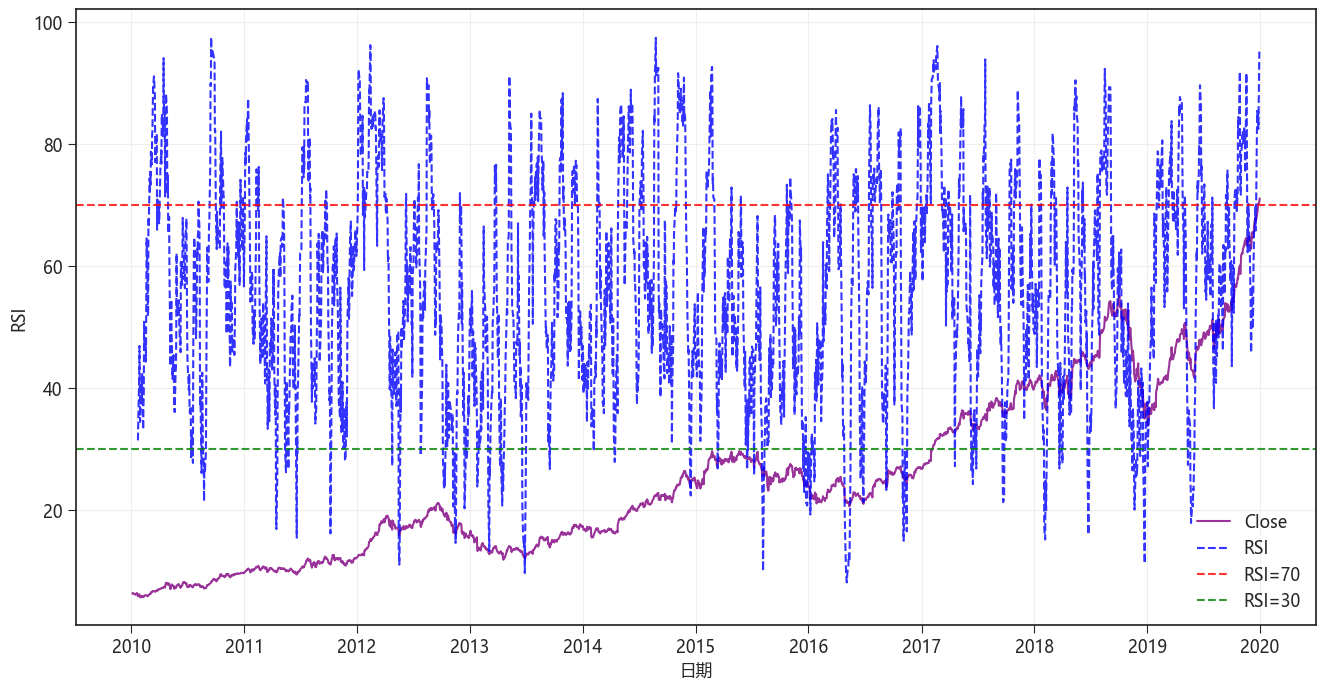

In [11]:
import pandas as pd
import yfinance as yf
# 获取数据
ticker_symbol = 'AAPL' # 苹果公司股票案例
start_date, end_date = '2010-01-01', '2020-01-01'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
# 计算每日的价格变化
delta = stock_data['Close'].diff()
# 计算上涨和下跌幅度
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean() # 计算14天的平均上涨幅度
loss = -(delta.where(delta < 0, 0)).rolling(window=14).mean() # 计算14天的平均下跌幅度
# 计算相对强度RS
rs = gain / loss
# 计算RSI
stock_data['RSI'] = 100 - (100 / (1 + rs))
# 显示计算结果
print(stock_data[['Close', 'RSI']].tail())
# 可视化RSI
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8-ticks')
# 设置字体为微软字体（如微软雅黑）
plt.rcParams['font.family'] = 'Microsoft YaHei'
# 设置字体大小
plt.rcParams['font.size'] = 12  # 可根据需要调整字体大小
plt.figure(figsize=(16, 8), dpi=100)
plt.plot(stock_data['Close'], color='purple', linestyle='-', alpha=0.8, label='Close')
plt.plot(stock_data['RSI'], color='blue', label='RSI', linestyle='--', alpha=0.8)
plt.axhline(70, color='red', linestyle='--', label='RSI=70', alpha=0.8)
plt.axhline(30, color='green', linestyle='--', label='RSI=30', alpha=0.8)
plt.xlabel('日期')
plt.ylabel('RSI')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.show()